# Wolfgang Rosenstiel Forum für KI

## Was ist Maschinelles Lernen?

## Eine Antwort (Arthur Samuel)

Maschinelles Lernen ist ein Feld der Künstlichen Intelligenz. Es wendet statistische Techniken an, um Computern die Fähigkeit zu verleihen, aus Daten zu lernen, ohne explizit programmiert zu sein.

## Andere Antwort (nach Andrew Glassner)

- Techniken, die Information aus Daten extrahieren
- *Daten:* alles was man messen und aufzeichnen kann
- *Information:* was wir interessant finden

<img src="img/ag/Figure-01-001.png">

<img src="img/ag/Figure-01-002.png">

## Andere Antwort (frei nach François Chollet)

- Ein Teilgebiet der künstlichen Intelligenz
- KI: Automatisierung von Aufgaben, die bisher nur Menschen erledigen konnten
  - Das geht auch mit regelbasierten Systemen
  - Beispiel: Schach, Expertensystem
- ML: Der Teil der KI, der versucht Verhalten zu verbessern, wenn mehr Daten zur Verfügung stehen

### Regelbasierte Systeme: Feature Engineering

Extraktion von relevanten Features aus Daten.

<img src="img/ag/Figure-01-003.png" style="width: 40%; margin-left: auto; margin-right: auto;">

<img src="img/ag/Figure-01-004.png" style="width: 20%; margin-left: auto; margin-right: auto;">

## Nochmal François Chollet

- Traditionelles Programmieren:
    - Wir programmieren eine Lösung für ein Problem:
    - Regeln + Daten $\Rightarrow$ Antworten
- ML:
    - Wir extrahieren Regeln aus (gelabelten) Daten
    - Daten + Antworten $\Rightarrow$ Regeln

# Was ist Deep Learning

- Eine Form von ML, die auf künstlichen neuronalen Netzen basiert
- Im Deep Learning erfolgt die Berechnung in "Schichten", die immer algemeinere Features extrahieren
- Deep Learning benötigt weniger Feature Engineering als andere Ansätze
- Braucht aber (meistens) mehr Daten!

## Klassifizierung

<img src="img/ag/Figure-01-022.png" style="float: right;width: 40%;"/>


- Viele Daten, vorgegebene Menge an möglichen Werten
- Weise jedem Datensatz einen oder mehrere Labels zu

In [392]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
path

Path('/home/tc/.fastai/data/oxford-iiit-pet/images')

In [391]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.175255,0.005490,0.001353,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.052988,0.010016,0.003383,00:13


## Clustering

<img src="img/ag/Figure-01-013.jpg" style="float: right;width: 40%;"/>

- Viele Datenpunkte
- Finde heraus, welche "ähnlich" sind

Often mit "unsupervised" Learning


## Regression

<img src="img/ag/Figure-01-011.png" style="float: right;width: 40%;"/>

- Lerne numerische Beziehungen
- Wie hängt das Gehalt von Jahren Berufserfahrung ab?

## Geocoding / Toponym-Auflösung

<img src="img/france.jpg" style="float: right;width: 40%;"/>

<div style="float: left; width: 60%;">

<br/>

- Finde Koordinaten, die zum Vorkommen von Namen in Text gehören
- Inverses Geocoding: Welcher Ortsname gehört zu Koordinaten

</div>

## (Extractive) Question Answering

<img src="img/question-mark.jpg" style="float: right;width: 30%;"/>


- Textdokument, Frage basierend auf dem Dokument
- Extrahiere die Antwort aus dem Dokument

# Vorgehensweise beim Supervised Learning

<img src="img/ag/Figure-01-007.png" style="float: right;width: 40%; padding: 20pt;"/>

- Modell: Algorithmus mitveränderbaren<br/>
  Parametern
- Datenpunkte mit Labels
- Generalisiere die Information<br/>
  in den gelabelten Daten
- Verbessere die Performance des<br/>
  Systems durch "Tunen" der Parameter

### Einfaches Beispiel: Lineare Regression

- Ein einziges numerisches Feature
- Ein numerisches Label
- Wir versuchen eine lineare Funktion der Form $y = w x + b$ zu finden, die "möglichst gut passt"

#### Daten

- Wir erzeugen uns für dieses Beispiel synthetische Daten:

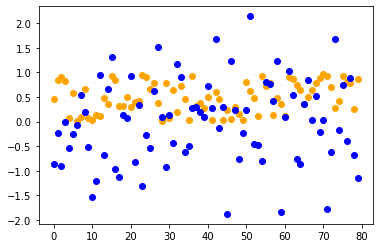

In [394]:
import torch
num_samples = 80

plt.scatter(range(num_samples), torch.rand(num_samples), color='orange')
plt.scatter(range(num_samples), torch.randn(num_samples), color='blue');

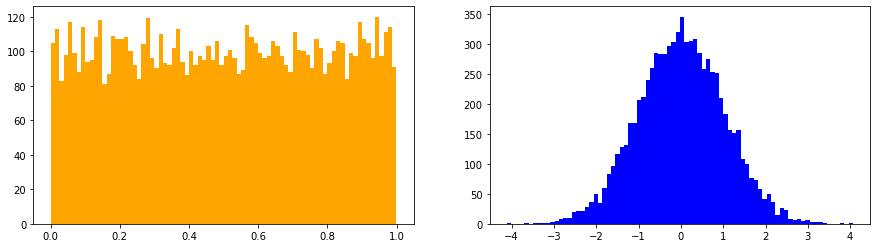

In [398]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.hist(torch.rand(100 * num_samples).numpy(), bins=num_samples, color='orange')
plt.subplot(1, 2, 2)
plt.hist(torch.randn(100 * num_samples).numpy(), bins=num_samples, color='blue');

In [419]:
torch.set_default_dtype(torch.float32)

In [420]:
t = torch.tensor([[1.0, 2, 3], [4, 5, 6]])

In [421]:
t.dtype

torch.float32

In [422]:
x = torch.rand(num_samples) * 10
y = 5 * x - 10 + 5 * torch.randn(num_samples)
x[:5], y[:5]

(tensor([1.7398, 6.9362, 4.5626, 6.0189, 2.1157]),
 tensor([-3.0178, 25.5249, 11.3611, 18.4219,  2.2533]))

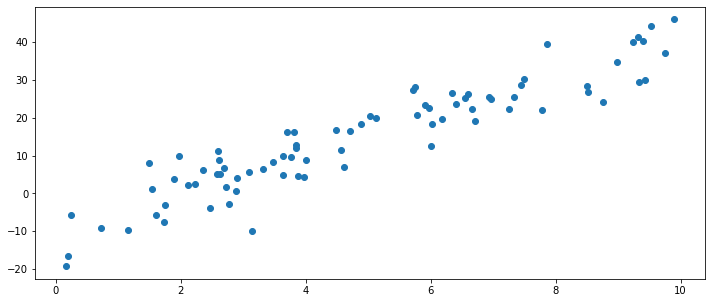

In [423]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.scatter(x, y);

### Realistischer

<img src="img/ag/Figure-01-007.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

### Anpassen eines Linearen Modells

In [424]:
def model(x, w, b):
    return w * x + b

### Bestimmen der Qualität: Loss

- Verschiedene Varianten: 
- RMSE
- MSE 
- MAE

In [451]:
def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true) ** 2
    return squared_diffs.mean()

## Evaluierung/Test

<img src="img/ag/Figure-01-009.png" style="width: 70%; margin-left: auto; margin-right: auto;"/>

### Evaluieren des Modells:
(Hinweis: Broadcasting)

In [430]:
w = torch.tensor(1.0)
b = torch.tensor(0.0)
w, b, x

(tensor(1.),
 tensor(0.),
 tensor([1.7398, 6.9362, 4.5626, 6.0189, 2.1157, 6.1852, 5.9710, 6.5972, 9.4002,
         5.0310, 0.7227, 2.3605, 3.7574, 2.6222, 9.2345, 9.3135, 6.5477, 6.6549,
         7.4959, 2.5879, 2.4627, 4.4766, 3.9984, 8.9844, 1.4892, 3.6423, 3.7057,
         9.4242, 1.7278, 5.7724, 7.2499, 1.8884, 3.8450, 6.7125, 9.7417, 9.3278,
         3.9649, 1.5950, 3.8452, 7.3251, 3.8752, 6.0046, 0.1889, 9.5225, 7.4463,
         2.5793, 8.5199, 7.8585, 2.2312, 3.0935, 6.3467, 6.4114, 2.6054, 1.5389,
         5.7455, 0.2412, 7.7863, 2.7666, 2.8896, 4.7071, 1.1591, 4.8838, 3.8039,
         2.7263, 0.1570, 5.7179, 3.3155, 5.1209, 5.9061, 3.4715, 1.9648, 6.9670,
         2.9030, 4.6059, 3.1365, 8.7611, 9.9010, 2.6972, 3.6401, 8.5051]))

In [ ]:
y_pred = model(x, w, b)
y_true = y
y_pred[:5], y_true[:5]

In [431]:
loss = loss_fn(y_pred, y_true)
loss.item()

66.54569244384766

In [450]:
m = torch.randn(4, 5)
n = torch.randn(6, 4, 5)
(m + n).shape

torch.Size([6, 4, 5])

## Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-006.png" style="width: 50%; margin-left: auto; margin-right: auto; 0"/>

## Wie updaten wir die Parameter?

<img src="img/ag/Figure-05-007.png" style="width: 50%; margin-left: auto; margin-right: auto; 0"/>

In [ ]:
def update_parameter(p, rate_of_change, learning_rate = 1e-2):
    p -= learning_rate * rate_of_change

### Mathematisch
$$\nabla_{w, b} L = \Bigl(\frac{\partial L}{\partial w}, \frac{\partial L}{\partial b} \Bigr)
= \Bigl(\frac{\partial L}{\partial m}\cdot\frac{\partial m}{\partial w},
\frac{\partial L}{\partial m} \cdot \frac{\partial m}{\partial b} \Bigr)$$

In [ ]:
def model(x, w, b):
    return w * x + b

In [ ]:
def dmodel_dw(x, w, b):
    return x
def dmodel_db(x, w, b):
    return 1.0

$$\nabla_{w, b} L 
= \Bigl(\frac{\partial L}{\partial m}\cdot\frac{\partial m}{\partial w},
\frac{\partial L}{\partial m} \cdot \frac{\partial m}{\partial b} \Bigr)$$

In [452]:
def gradient_fn(x, y_pred, y_true, w, b):
    dloss_dm = 2 * (y_pred - y_true) / y_pred.size(0)
    dm_dw = dloss_dm * dmodel_dw(x, w, b)
    dm_db = dloss_dm * dmodel_db(x, w, b)
    return torch.stack([dm_dw.sum(), dm_db.sum()])

## Training

<br/>
<img src="img/ag/Figure-01-008.png" style="width: 100%;"/>

### Die Training-Loop

In [454]:
def training_loop(n_epochs, learning_rate, params, x, y_true):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        # _.forward()
        y_pred = model(x, w, b)
        loss = loss_fn(y_pred, y_true)
        gradient = gradient_fn(x, y_pred, y_true, w, b)
        # _.backward()
        params -= learning_rate * gradient
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: loss = {loss.item():8.3f} "
                  f"(w = {w.item():6.3f}, b = {b.item():6.3f}, "
                  f"gradient = ({gradient[0]:.3f}, {gradient[1]:.3f})")
    return params

In [455]:
training_loop(
    n_epochs=100,
    learning_rate=0.1,
    params=torch.tensor([1.0, 0.0]),
    x=x,
    y_true=y
)

Epoch    1: loss =  238.615 (w = 16.211, b =  1.952, gradient = (-152.114, -19.524)
Epoch    2: loss = 5274.915 (w = -63.771, b = -11.269, gradient = (799.824, 132.211)
Epoch    3: loss = 146186.078 (w = 359.652, b = 55.885, gradient = (-4234.229, -671.533)
Epoch    4: loss = 4087174.000 (w = -1879.170, b = -301.893, gradient = (22388.217, 3577.774)
Epoch   10: loss = 1955877372297216.000 (w = -41188704.000, b = -6574587.000, gradient = (489771584.000, 78177848.000)
Epoch   20: loss = 572639146531779088958122622976.000 (w = -704770713059328.000, b = -112496232890368.000, gradient = (8380372400209920.000, 1337683536248832.000)
Epoch   30: loss =      inf (w = -12059170502719758663680.000, b = -1924896605320840740864.000, gradient = (143394621142675847380992.000, 22888790753172961361920.000)
Epoch   40: loss =      inf (w = -206341801185600410882876112896.000, b = -32936480322794624287732924416.000, gradient = (2453593682201892312791186931712.000, 391645006342834196852796030976.000)
Epoc

tensor([nan, nan])

## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-013.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-014.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>


## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-015.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>


## Wie viel updaten wir die Parameter?

<img src="img/ag/Figure-19-016.png" style="width: 80%; margin-left: auto; margin-right: auto; 0"/>

In [456]:
training_loop(
    n_epochs=100,
    learning_rate=0.01,
    params=torch.tensor([1.0, 0.0]),
    x=x,
    y_true=y
)

Epoch    1: loss =  238.615 (w =  2.521, b =  0.195, gradient = (-152.114, -19.524)
Epoch    2: loss =   77.298 (w =  3.090, b =  0.239, gradient = (-56.920, -4.351)
Epoch    3: loss =   54.888 (w =  3.306, b =  0.226, gradient = (-21.587, 1.268)
Epoch    4: loss =   51.615 (w =  3.391, b =  0.193, gradient = (-8.470, 3.340)
Epoch   10: loss =   49.869 (w =  3.480, b = -0.070, gradient = (-0.731, 4.451)
Epoch   20: loss =   47.919 (w =  3.549, b = -0.505, gradient = (-0.680, 4.258)
Epoch   30: loss =   46.137 (w =  3.615, b = -0.920, gradient = (-0.650, 4.071)
Epoch   40: loss =   44.508 (w =  3.679, b = -1.318, gradient = (-0.621, 3.892)
Epoch   50: loss =   43.019 (w =  3.739, b = -1.697, gradient = (-0.594, 3.721)
Epoch   60: loss =   41.659 (w =  3.797, b = -2.060, gradient = (-0.568, 3.557)
Epoch   70: loss =   40.415 (w =  3.853, b = -2.407, gradient = (-0.543, 3.401)
Epoch   80: loss =   39.278 (w =  3.906, b = -2.739, gradient = (-0.519, 3.251)
Epoch   90: loss =   38.239 (w = 

tensor([ 4.0048, -3.3595])

In [457]:
params = training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    x=x,
    y_true=y
)

Epoch    1: loss =  238.615 (w =  2.521, b =  0.195, gradient = (-152.114, -19.524)
Epoch    2: loss =   77.298 (w =  3.090, b =  0.239, gradient = (-56.920, -4.351)
Epoch    3: loss =   54.888 (w =  3.306, b =  0.226, gradient = (-21.587, 1.268)
Epoch    4: loss =   51.615 (w =  3.391, b =  0.193, gradient = (-8.470, 3.340)
Epoch  100: loss =   37.290 (w =  4.005, b = -3.359, gradient = (-0.474, 2.971)
Epoch  200: loss =   31.305 (w =  4.386, b = -5.747, gradient = (-0.303, 1.895)
Epoch  300: loss =   28.870 (w =  4.629, b = -7.270, gradient = (-0.193, 1.209)
Epoch  400: loss =   27.880 (w =  4.784, b = -8.241, gradient = (-0.123, 0.771)
Epoch  500: loss =   27.477 (w =  4.883, b = -8.861, gradient = (-0.078, 0.492)
Epoch  600: loss =   27.313 (w =  4.946, b = -9.256, gradient = (-0.050, 0.314)
Epoch  700: loss =   27.247 (w =  4.986, b = -9.508, gradient = (-0.032, 0.200)
Epoch  800: loss =   27.220 (w =  5.012, b = -9.669, gradient = (-0.020, 0.128)
Epoch  900: loss =   27.208 (w = 

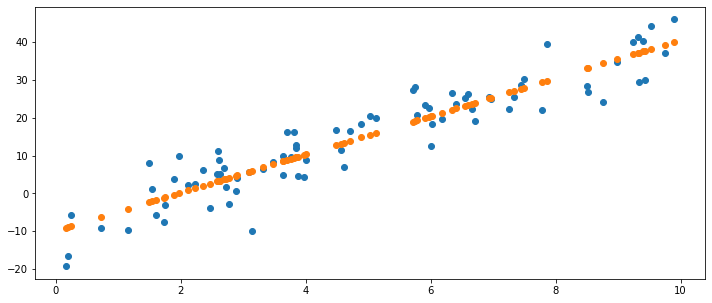

In [458]:
y_pred = model(x, *params)
plt.figure(figsize=(12, 5))
plt.scatter(x, y)
plt.scatter(x, y_pred);

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Lineare Regression"

*Hinweis:* Bitte versuchen Sie die Lösung so weit wie möglich ohne Bezugnahme auf dieses Notebook zu lösen.

### Normalisieren der Inputs


In [459]:
x_mean = x.mean()
x_std = x.std()
y_mean = y.mean()
y_std = y.std()
x_mean, x_std, y_mean, y_std

(tensor(4.8592), tensor(2.6728), tensor(14.6214), tensor(14.4996))

In [460]:
x_norm = (x - x_mean) / x_std
y_norm = (y - y_mean) / y_std
y_norm[:5], y_norm.mean(), y_norm.std()

(tensor([-1.2165,  0.7520, -0.2249,  0.2621, -0.8530]),
 tensor(-2.7567e-08),
 tensor(1.))

In [462]:
params = training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    x=x_norm,
    y_true=y_norm
)

Epoch    1: loss =    0.134 (w =  0.999, b =  0.000, gradient = (0.134, -0.000)
Epoch    2: loss =    0.134 (w =  0.997, b =  0.000, gradient = (0.131, -0.000)
Epoch    3: loss =    0.134 (w =  0.996, b =  0.000, gradient = (0.129, -0.000)
Epoch    4: loss =    0.133 (w =  0.995, b =  0.000, gradient = (0.126, -0.000)
Epoch  100: loss =    0.129 (w =  0.941, b =  0.000, gradient = (0.019, 0.000)
Epoch  200: loss =    0.129 (w =  0.933, b =  0.000, gradient = (0.003, 0.000)
Epoch  300: loss =    0.129 (w =  0.932, b =  0.000, gradient = (0.000, 0.000)
Epoch  400: loss =    0.129 (w =  0.932, b =  0.000, gradient = (0.000, 0.000)
Epoch  500: loss =    0.129 (w =  0.932, b =  0.000, gradient = (0.000, 0.000)
Epoch  600: loss =    0.129 (w =  0.932, b =  0.000, gradient = (0.000, 0.000)
Epoch  700: loss =    0.129 (w =  0.932, b =  0.000, gradient = (0.000, 0.000)
Epoch  800: loss =    0.129 (w =  0.932, b =  0.000, gradient = (0.000, 0.000)
Epoch  900: loss =    0.129 (w =  0.932, b =  0.

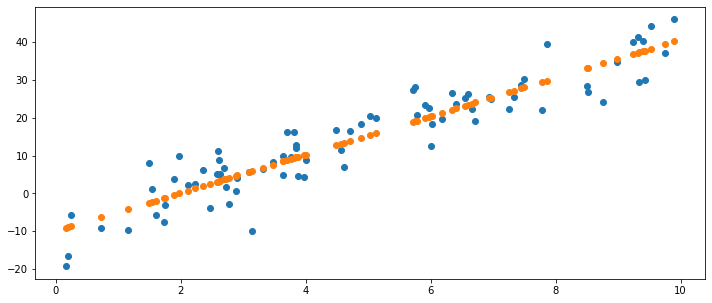

In [463]:
y_pred = model(x_norm, *params) * y_std + y_mean
plt.figure(figsize=(12, 5))
plt.scatter(x, y)
plt.scatter(x_norm * x_std + x_mean, y_pred);

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Normierte Parameter"

# Autograd

Das Berechnen der Gradienten ist mühsam und fehleranfällig.

PyTorch kann das für uns übernehmen.

In [464]:
def model(x, w, b):
    return w * x + b

def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true) ** 2
    return squared_diffs.mean()

In [465]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [467]:
params.grad is None

True

In [468]:
loss = loss_fn(model(x, *params), y)
loss.backward()
params.grad

tensor([-152.1143,  -19.5244])

Was passiert, wenn wir die Loss-Funktion mehrmals auswerten?

In [476]:
loss = loss_fn(model(x, *params), y)
loss.backward()

params.grad

tensor([-1369.0284,  -175.7196])

In [478]:
if params.grad is not None:
    params.grad.zero_()

In [479]:
params.grad

tensor([0., 0.])

In [480]:
def training_loop(n_epochs, learning_rate, params, x, y_true):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        # model.forward()
        y_pred = model(x, *params)
        loss = loss_fn(y_pred, y_true)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            if epoch < 5 or epoch % (n_epochs // 10) == 0:
                print(f"Epoch {epoch:4}: loss = {loss.item():8.3f} "
                      f"(w = {params[0].item():6.3f}, b = {params[1].item():6.3f}, "
                      f"gradient = ({params.grad[0]:.3f}, {params.grad[1]:.3f})")

In [482]:
training_loop(
    n_epochs=1000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0], requires_grad=True),
    x=x,
    y_true=y
)

Epoch    1: loss =  238.615 (w =  2.521, b =  0.195, gradient = (-152.114, -19.524)
Epoch    2: loss =   77.298 (w =  3.090, b =  0.239, gradient = (-56.920, -4.351)
Epoch    3: loss =   54.888 (w =  3.306, b =  0.226, gradient = (-21.587, 1.268)
Epoch    4: loss =   51.615 (w =  3.391, b =  0.193, gradient = (-8.470, 3.340)
Epoch  100: loss =   37.290 (w =  4.005, b = -3.359, gradient = (-0.474, 2.971)
Epoch  200: loss =   31.305 (w =  4.386, b = -5.747, gradient = (-0.303, 1.895)
Epoch  300: loss =   28.870 (w =  4.629, b = -7.270, gradient = (-0.193, 1.209)
Epoch  400: loss =   27.880 (w =  4.784, b = -8.241, gradient = (-0.123, 0.771)
Epoch  500: loss =   27.477 (w =  4.883, b = -8.861, gradient = (-0.078, 0.492)
Epoch  600: loss =   27.313 (w =  4.946, b = -9.256, gradient = (-0.050, 0.314)
Epoch  700: loss =   27.247 (w =  4.986, b = -9.508, gradient = (-0.032, 0.200)
Epoch  800: loss =   27.220 (w =  5.012, b = -9.669, gradient = (-0.020, 0.128)
Epoch  900: loss =   27.208 (w = 

# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Autograd"

# Optimierer

- Pytorch hat mehrere Optimierungsstrategien
- Diese arbeiten auf Batches

In [483]:
import torch.optim as optim
[name for name in dir(optim) if name[0] != '_']

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 'lr_scheduler']

In [484]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [485]:
y_pred = model(x, *params)
loss = loss_fn(y_pred, y_true)
loss.backward()
optimizer.step()
params

tensor([2.0758, 0.2219], requires_grad=True)

In [486]:
y_pred = model(x, *params)
loss = loss_fn(y_pred, y_true)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([2.4702, 0.3347], requires_grad=True)

In [487]:
def training_loop(n_epochs, optimizer, params, x, y_true):
    for epoch in range(1, n_epochs + 1):
        # model.forward()
        y_pred = model(x, *params)
        loss = loss_fn(y_pred, y_true)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: loss = v{loss.item():8.3f} "
                  f"(w = {params[0].item():6.3f}, b = {params[1].item():6.3f}, "
                  f"gradient = ({params.grad[0]:.3f}, {params.grad[1]:.3f})")

In [488]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    x=x,
    y_true=y
)

Epoch    1: loss = v 238.615 (w =  2.521, b =  0.195, gradient = (-152.114, -19.524)
Epoch    2: loss = v  77.298 (w =  3.090, b =  0.239, gradient = (-56.920, -4.351)
Epoch    3: loss = v  54.888 (w =  3.306, b =  0.226, gradient = (-21.587, 1.268)
Epoch    4: loss = v  51.615 (w =  3.391, b =  0.193, gradient = (-8.470, 3.340)
Epoch  100: loss = v  37.290 (w =  4.005, b = -3.359, gradient = (-0.474, 2.971)
Epoch  200: loss = v  31.305 (w =  4.386, b = -5.747, gradient = (-0.303, 1.895)
Epoch  300: loss = v  28.870 (w =  4.629, b = -7.270, gradient = (-0.193, 1.209)
Epoch  400: loss = v  27.880 (w =  4.784, b = -8.241, gradient = (-0.123, 0.771)
Epoch  500: loss = v  27.477 (w =  4.883, b = -8.861, gradient = (-0.078, 0.492)
Epoch  600: loss = v  27.313 (w =  4.946, b = -9.256, gradient = (-0.050, 0.314)
Epoch  700: loss = v  27.247 (w =  4.986, b = -9.508, gradient = (-0.032, 0.200)
Epoch  800: loss = v  27.220 (w =  5.012, b = -9.669, gradient = (-0.020, 0.128)
Epoch  900: loss = v 

In [489]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    x=x,
    y_true=y
)

Epoch    1: loss = v 238.615 (w =  2.000, b =  1.000, gradient = (-152.114, -19.524)
Epoch    2: loss = v 108.361 (w =  2.941, b =  1.899, gradient = (-81.063, -7.806)
Epoch    3: loss = v  61.241 (w =  3.720, b =  2.491, gradient = (-14.594, 3.140)
Epoch    4: loss = v  75.180 (w =  4.215, b =  2.630, gradient = (38.944, 11.895)
Epoch  100: loss = v  27.202 (w =  5.050, b = -9.885, gradient = (-0.153, 0.003)
Epoch  200: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (0.002, 0.000)
Epoch  300: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (-0.000, 0.000)
Epoch  400: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (-0.000, -0.000)
Epoch  500: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (0.000, 0.000)
Epoch  600: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (0.000, 0.000)
Epoch  700: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (0.000, 0.000)
Epoch  800: loss = v  27.201 (w =  5.057, b = -9.952, gradient = (-0.000, -0.000)
Epoch  900: loss = v  

# Randomisierung, Test/Validation/Train Split

In [490]:
torch.randperm(5)

tensor([4, 3, 2, 0, 1])

In [491]:
import math
n_samples = x.shape[0]
n_validation = math.floor(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
shuffled_indices[:5]

tensor([55, 16, 34, 11,  2])

In [492]:
train_indices = shuffled_indices[:-n_validation]
validation_indices = shuffled_indices[-n_validation:]
train_indices[:5], validation_indices[:5]

(tensor([55, 16, 34, 11,  2]), tensor([62, 19,  1, 27, 66]))

In [493]:
train_x = x[train_indices]
train_y = y[train_indices]
validation_x = x[validation_indices]
validation_y = y[validation_indices]

In [494]:
def training_loop(n_epochs, optimizer, params, x_train, y_train, x_val, y_val):
    for epoch in range(1, n_epochs + 1):
        y_train_pred = model(x_train, *params)
        loss_train = loss_fn(y_train_pred, y_train)

        y_val_pred = model(x_val, *params)
        loss_val = loss_fn(y_val_pred, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: training loss = {loss_train.item():8.3f}, "
                  f"validation loss = {loss_val.item():8.3f}")

In [495]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    params=params,
    x_train=train_x,
    y_train=train_y,
    x_val=validation_x,
    y_val=validation_y
)

Epoch    1: training loss =  231.212, validation loss =  268.226
Epoch    2: training loss =   84.978, validation loss =   71.492
Epoch    3: training loss =   62.393, validation loss =   34.906
Epoch    4: training loss =   58.696, validation loss =   26.721
Epoch  100: training loss =   39.974, validation loss =   19.309
Epoch  200: training loss =   32.751, validation loss =   19.273
Epoch  300: training loss =   30.047, validation loss =   20.243
Epoch  400: training loss =   29.035, validation loss =   21.207
Epoch  500: training loss =   28.656, validation loss =   21.937
Epoch  600: training loss =   28.514, validation loss =   22.435
Epoch  700: training loss =   28.461, validation loss =   22.759
Epoch  800: training loss =   28.441, validation loss =   22.965
Epoch  900: training loss =   28.434, validation loss =   23.093
Epoch 1000: training loss =   28.431, validation loss =   23.173


# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Optimierer, Randomisierung"

# Pytorch Module und Batches

In [496]:
import torch.nn as nn
linear_model = nn.Linear(1, 1, bias=True)
linear_model(torch.tensor([1.0]))

tensor([-0.0698], grad_fn=<AddBackward0>)

In [498]:
# Fehler
# linear_model(x)

In [506]:
m = torch.rand(2, 2, 1)
n = m.squeeze(-1)
m, n

(tensor([[[0.9257],
          [0.4013]],
 
         [[0.3957],
          [0.2699]]]),
 tensor([[0.9257, 0.4013],
         [0.3957, 0.2699]]))

In [508]:
x.shape, x.unsqueeze(-1).shape

(torch.Size([80]), torch.Size([80, 1]))

In [509]:
linear_model(x.unsqueeze(-1))[:5]

tensor([[0.3605],
        [3.3830],
        [2.0024],
        [2.8494],
        [0.5791]], grad_fn=<SliceBackward>)

*Hinweis:* Bei Modulen definiert man `forward()`, ruft sie aber als Funktion auf.

In [510]:
linear_model.weight

Parameter containing:
tensor([[0.5816]], requires_grad=True)

In [511]:
linear_model.bias

Parameter containing:
tensor([-0.6514], requires_grad=True)

In [513]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=0.01
)

In [514]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.0531]], requires_grad=True),
 Parameter containing:
 tensor([-0.0565], requires_grad=True)]

In [515]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, y_train, x_val, y_val):
    for epoch in range(1, n_epochs + 1):
        y_train_pred = model(x_train)
        loss_train = loss_fn(y_train_pred, y_train)

        y_val_pred = model(x_val)
        loss_val = loss_fn(y_val_pred, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch < 5 or epoch % (n_epochs // 10) == 0:
            print(f"Epoch {epoch:4}: training loss = {loss_train.item():8.3f}, "
                  f"validation loss = {loss_val.item():8.3f}")

In [516]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=0.01
)

In [517]:
training_loop(
    n_epochs=1000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    x_train=train_x.unsqueeze(-1),
    y_train=train_y.unsqueeze(-1),
    x_val=validation_x.unsqueeze(-1),
    y_val=validation_y.unsqueeze(-1)
)

Epoch    1: training loss =  530.086, validation loss =  639.560
Epoch    2: training loss =  135.529, validation loss =  136.662
Epoch    3: training loss =   74.970, validation loss =   49.053
Epoch    4: training loss =   65.426, validation loss =   31.397
Epoch  100: training loss =   42.188, validation loss =   19.611
Epoch  200: training loss =   33.580, validation loss =   19.154
Epoch  300: training loss =   30.357, validation loss =   20.056
Epoch  400: training loss =   29.151, validation loss =   21.051
Epoch  500: training loss =   28.700, validation loss =   21.825
Epoch  600: training loss =   28.531, validation loss =   22.360
Epoch  700: training loss =   28.467, validation loss =   22.711
Epoch  800: training loss =   28.444, validation loss =   22.935
Epoch  900: training loss =   28.435, validation loss =   23.074
Epoch 1000: training loss =   28.431, validation loss =   23.161


# Mini Workshop

- Notebook 010x Workshop Einführung
- Abschnitt "Module, Batching"